## Semantic Chunking

### Greg Kamradt`s method (Custom realisation)

In [2]:
from IPython.display import display, HTML

def display_long_text(text, font_size=12, max_height=300):
    """
    Display long text in a scrollable box in Jupyter notebook.
    
    Parameters:
    - text: str — текст для отображения.
    - font_size: int — размер шрифта.
    - max_height: int — максимальная высота блока в пикселях (если текста много — появится скролл).
    """
    display(HTML(f'''
        <div style="
            border: 1px solid #ccc;
            padding: 10px;
            font-family: monospace;
            font-size: {font_size}px;
            white-space: pre-wrap;
            line-height: 1.5;
            max-height: {max_height}px;
            overflow-y: auto;
        ">
            {text}
        </div>
    '''))

In [145]:
from rich.markdown import Markdown
from rich.pretty import Pretty

In [146]:
from striprtf.striprtf import rtf_to_text
with open("data/raw/Constitution_eng.rtf", "r", encoding="utf-8") as file:
    constitution_rtf = file.read()

constitution = rtf_to_text(constitution_rtf)


In [147]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', constitution)
print (f"{len(single_sentences_list)} senteneces were found")

743 senteneces were found


In [148]:
sentences_list = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
display(Pretty(sentences_list[:3], max_depth=2))

[
    {
        'sentence': '\nTHE CONSTITUTION OF THE RUSSIAN FEDERATION\n\nWe, the multinational people of the Russian 
Federation,\nunited by a common fate on our land,\nestablishing human rights and freedoms, civic peace and 
accord,\npreserving the historically established state unity,\nproceeding from the universally recognized 
principles of equality and self-determination of peoples,\nrevering the memory of ancestors who have conveyed to us
the love for the Fatherland, belief in the good and justice,\nreviving the sovereign statehood of Russia and 
asserting the firmness of its democratic basic,\nstriving to ensure the well-being and prosperity of 
Russia,\nproceeding from the responsibility for our Fatherland before the present and future generations, 
\nrecognizing ourselves as part of the world community,\nadopt the CONSTITUTION OF THE RUSSIAN FEDERATION.',
        'index': 0
    },
    {'sentence': 'FIRST SECTION\n\nCHAPTER 1.', 'index': 1},
    {
        'sentence': 'THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM\n\nArticle 1\n\nThe Russian Federation - Russia 
is a democratic federal law-bound State with a republican form of government.',
        'index': 2
    }
]

In [149]:
def combine_sentences(sentences, buffer_size=1):
    """Функция объединяет соседние предложения вокруг каждого предложения в списке.
Параметр buffer_size указывает, сколько предложений до и после текущего включать."""
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences_list)
display(Pretty(sentences[:3], max_depth=2))

[
    {
        'sentence': '\nTHE CONSTITUTION OF THE RUSSIAN FEDERATION\n\nWe, the multinational people of the Russian 
Federation,\nunited by a common fate on our land,\nestablishing human rights and freedoms, civic peace and 
accord,\npreserving the historically established state unity,\nproceeding from the universally recognized 
principles of equality and self-determination of peoples,\nrevering the memory of ancestors who have conveyed to us
the love for the Fatherland, belief in the good and justice,\nreviving the sovereign statehood of Russia and 
asserting the firmness of its democratic basic,\nstriving to ensure the well-being and prosperity of 
Russia,\nproceeding from the responsibility for our Fatherland before the present and future generations, 
\nrecognizing ourselves as part of the world community,\nadopt the CONSTITUTION OF THE RUSSIAN FEDERATION.',
        'index': 0,
        'combined_sentence': '\nTHE CONSTITUTION OF THE RUSSIAN FEDERATION\n\nWe, the multinational people of the 
Russian Federation,\nunited by a common fate on our land,\nestablishing human rights and freedoms, civic peace and 
accord,\npreserving the historically established state unity,\nproceeding from the universally recognized 
principles of equality and self-determination of peoples,\nrevering the memory of ancestors who have conveyed to us
the love for the Fatherland, belief in the good and justice,\nreviving the sovereign statehood of Russia and 
asserting the firmness of its democratic basic,\nstriving to ensure the well-being and prosperity of 
Russia,\nproceeding from the responsibility for our Fatherland before the present and future generations, 
\nrecognizing ourselves as part of the world community,\nadopt the CONSTITUTION OF THE RUSSIAN FEDERATION. FIRST 
SECTION\n\nCHAPTER 1.'
    },
    {
        'sentence': 'FIRST SECTION\n\nCHAPTER 1.',
        'index': 1,
        'combined_sentence': '\nTHE CONSTITUTION OF THE RUSSIAN FEDERATION\n\nWe, the multinational people of the 
Russian Federation,\nunited by a common fate on our land,\nestablishing human rights and freedoms, civic peace and 
accord,\npreserving the historically established state unity,\nproceeding from the universally recognized 
principles of equality and self-determination of peoples,\nrevering the memory of ancestors who have conveyed to us
the love for the Fatherland, belief in the good and justice,\nreviving the sovereign statehood of Russia and 
asserting the firmness of its democratic basic,\nstriving to ensure the well-being and prosperity of 
Russia,\nproceeding from the responsibility for our Fatherland before the present and future generations, 
\nrecognizing ourselves as part of the world community,\nadopt the CONSTITUTION OF THE RUSSIAN FEDERATION. FIRST 
SECTION\n\nCHAPTER 1. THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM\n\nArticle 1\n\nThe Russian Federation - Russia
is a democratic federal law-bound State with a republican form of government.'
    },
    {
        'sentence': 'THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM\n\nArticle 1\n\nThe Russian Federation - Russia 
is a democratic federal law-bound State with a republican form of government.',
        'index': 2,
        'combined_sentence': 'FIRST SECTION\n\nCHAPTER 1. THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM\n\nArticle 
1\n\nThe Russian Federation - Russia is a democratic federal law-bound State with a republican form of government. 
The names "Russian Federation" and "Russia" shall be equal.'
    }
]

In [150]:
from sentence_transformers import SentenceTransformer, models
# BAAI/bge-base-en-v1.5 - sota solution
model = SentenceTransformer("BAAI/bge-base-en-v1.5")
embeddings = model.encode([x['combined_sentence'] for x in sentences]).tolist()

# embeddings = giga_embeds.embed_documents([x['combined_sentence'] for x in sentences])

/Users/admin/Desktop/RAG lawyer assistant/.venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [151]:
for _i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[_i]

In [152]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    """Цель функции — вычислить расстояние между объединёнными предложениями, 
    представленными как векторные эмбеддинги.
    0 — это максимально похожие, а 1 — максимально разные."""
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']

        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]

        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [153]:
distances, sentences = calculate_cosine_distances(sentences)

In [154]:
display(Pretty(distances[:3], max_depth=1))

[0.012611756865979706, 0.18842518346898351, 0.024774948031554445]

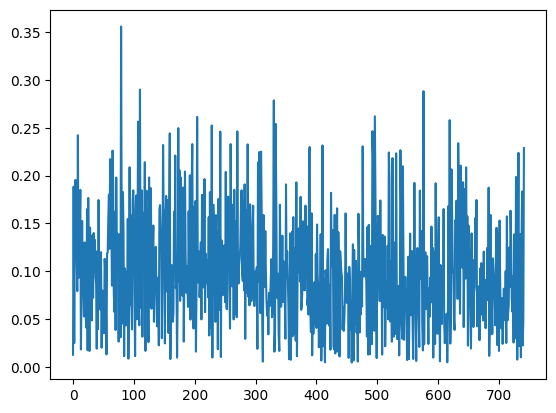

In [155]:
import matplotlib.pyplot as plt

plt.plot(distances)

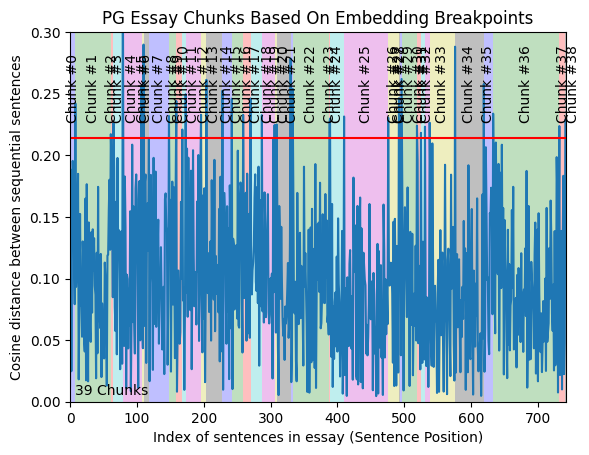

In [156]:
import numpy as np

plt.plot(distances)

y_upper_bound = .3
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for _i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if _i == 0 else indices_above_thresh[_i - 1]
    end_index = breakpoint_index if _i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[_i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{_i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{_i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [159]:
# Initialize the start index
start_index_ = 0

# Create a list to hold the grouped sentences
chunks_greg_custom = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index_ = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index_:end_index_ + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks_greg_custom.append(combined_text)

    # Update the start index for the next group
    start_index_ = index + 1

# The last group, if any sentences remain
if start_index_ < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index_:]])
    chunks_greg_custom.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [160]:
# Chunk examples
chunk_num = 1
display_long_text(f'Chunk #{chunk_num}\n\n{chunks_greg_custom[chunk_num]}')

## Statistical Chunker (Greg Kamradt`s method variation)

In [49]:
display_long_text(constitution[:10**4])

In [ ]:
from semantic_router.encoders import HuggingFaceEncoder
from semantic_chunkers import StatisticalChunker

# Инициализируем энкодер с моделью BAAI/bge-base-en-v1.5
encoder = HuggingFaceEncoder(
    name="BAAI/bge-base-en-v1.5",
    embedding_instruction="Represent this sentence for clustering:"
)

# Инициализируем StatisticalChunker
chunker_stat = StatisticalChunker(encoder=encoder)

# Разбиваем на чанки
chunks_stat = chunker_stat(docs=[constitution])

2025-06-05 18:27:56 INFO semantic_chunkers.utils.logger Single document exceeds the maximum token limit of 300. Splitting to sentences before semantically merging.
100%|██████████| 16/16 [01:36<00:00,  6.03s/it]


In [144]:
len(chunks_stat[0])

NameError: name 'chunks_stat' is not defined

In [ ]:
chunker_stat.print(chunks_stat[0][:5])

Split 1, tokens 168, triggered by: 0.66
THE CONSTITUTION OF THE RUSSIAN FEDERATION We, the multinational people of the Russian Federation, united by a common fate on our land, establishing human rights and freedoms, civic peace and accord, preserving the historically established state unity, proceeding from the universally recognized principles of equality and self-determination of peoples, revering the memory of ancestors who have conveyed to us the love for the Fatherland, belief in the good and justice, reviving the sovereign statehood of Russia and asserting the firmness of its democratic basic, striving to ensure the well-being and prosperity of Russia, proceeding from the responsibility for our Fatherland before the present and future generations, recognizing ourselves as part of the world community, adopt the CONSTITUTION OF THE RUSSIAN FEDERATION.
----------------------------------------------------------------------------------------


Split 2, tokens 162, triggered by: 0.60
F

## ConsecutiveChunker
New sentences are being added to chunk until cosine similarity between new sentence's embedding and and last N sentences mean embedding remains above certain threshold

In [136]:
from semantic_chunkers import ConsecutiveChunker

# Initialization
chunker_cons = ConsecutiveChunker(encoder=encoder, score_threshold=0.5)

# Chunking
chunks_cons = chunker_cons(docs=[constitution])

100%|██████████| 1001/1001 [00:00<00:00, 422214.23it/s]


In [137]:
len(chunks_cons[0])

26

In [138]:
chunker_cons.print(chunks_cons[0][:5])

Split 1, tokens None, triggered by: 0.48
THE CONSTITUTION OF THE RUSSIAN FEDERATION We, the multinational people of the Russian Federation, united by a common fate on our land, establishing human rights and freedoms, civic peace and accord, preserving the historically established state unity, proceeding from the universally recognized principles of equality and self-determination of peoples, revering the memory of ancestors who have conveyed to us the love for the Fatherland, belief in the good and justice, reviving the sovereign statehood of Russia and asserting the firmness of its democratic basic, striving to ensure the well-being and prosperity of Russia, proceeding from the responsibility for our Fatherland before the present and future generations, recognizing ourselves as part of the world community, adopt the CONSTITUTION OF THE RUSSIAN FEDERATION. FIRST SECTION CHAPTER 1. THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM Article 1 The Russian Federation - Russia is a democratic fe

## Cumulative chunking 
Cumulative chunking adds new sentences to chunk until cosine similarity between new sentence's embedding and and chunk's cumulative embedding remains above certain threshold

In [95]:
from semantic_chunkers import CumulativeChunker

# Initialization
chunker_cumulative = CumulativeChunker(encoder=encoder, score_threshold=0.55)

# Chunking
chunks_cumulative = chunker_cumulative(docs=[constitution])

100%|██████████| 1002/1002 [16:42<00:00,  1.00s/it]


In [96]:
len(chunks_cumulative[0])

14

In [98]:
chunker_cumulative.print(chunks_cumulative[0][:5])

Split 1, tokens None, triggered by: 0.48
THE CONSTITUTION OF THE RUSSIAN FEDERATION We, the multinational people of the Russian Federation, united by a common fate on our land, establishing human rights and freedoms, civic peace and accord, preserving the historically established state unity, proceeding from the universally recognized principles of equality and self-determination of peoples, revering the memory of ancestors who have conveyed to us the love for the Fatherland, belief in the good and justice, reviving the sovereign statehood of Russia and asserting the firmness of its democratic basic, striving to ensure the well-being and prosperity of Russia, proceeding from the responsibility for our Fatherland before the present and future generations, recognizing ourselves as part of the world community, adopt the CONSTITUTION OF THE RUSSIAN FEDERATION. FIRST SECTION CHAPTER 1. THE FUNDAMENTALS OF THE CONSTITUTIONAL SYSTEM Article 1 The Russian Federation - Russia is a democratic fe

## REGEX Chunking
Chunking by some separator matching regex

In [114]:
import re

def split_by_articles(text):
    pattern = r"(?m)^Article\s+\d+"
    matches = list(re.finditer(pattern, text))

    chunks = []

    # 1. Добавим преамбулу (до первого Article), если она есть
    if matches and matches[0].start() > 0:
        preamble = text[:matches[0].start()].strip()
        if preamble:
            chunks.append(preamble)

    # 2. Стандартная логика для Article N -> Article N+1
    for i in range(len(matches)):
        start = matches[i].start()
        end = matches[i + 1].start() if i + 1 < len(matches) else len(text)
        chunk = text[start:end].strip()
        chunks.append(chunk)

    return chunks


In [115]:
chunks_regex = split_by_articles(constitution)


In [116]:
# Chunk examples
chunk_num = 0
display_long_text(f'Chunk #{chunk_num}\n\n{chunks_regex[chunk_num]}')

## Save all chunks

In [133]:
import json
import semantic_chunkers

def save_chunks_to_json(chunks, filepath):
    def clear_chunk(chunk: any):
        if type(chunk) == semantic_chunkers.schema.Chunk:
            return ' '.join(chunk.splits)
        return chunk
    
    chunk_dict = {f"chunk_{i+1}": clear_chunk(chunk) for i, chunk in enumerate(chunks)}

    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(chunk_dict, f, indent=2, ensure_ascii=False)

In [163]:
# Greg Kamradt's method custom implementation chunks
greg_custom_chunks_path = 'data/chunks/chunks_greg_custom.json'
save_chunks_to_json(chunks_greg_custom, greg_custom_chunks_path)


In [117]:
# regex chunks
regex_chunks_path = 'data/chunks/chunks_regex.json'
save_chunks_to_json(chunks_regex, regex_chunks_path)

In [134]:
# cumulative chunks
cumulative_chunks_path = 'data/chunks/chunks_cumulative.json'
save_chunks_to_json(chunks_cumulative[0], cumulative_chunks_path)

In [143]:
# consecutive chunks
consecutive_chunks_path = 'data/chunks/chunks_consecutive.json'
save_chunks_to_json(chunks_cons[0], consecutive_chunks_path)
